In [1]:
# Add lib input sys.path
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import numpy as np
import pandas as pd

import libs.linear_models as lm
import libs.data_util as data

import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

%matplotlib inline

#### Exercise 4.1

* For $h(x) \in \mathcal{H}_2$, we have $h(x) = a_0 + a_1x + a_2x^2$, the parameters are $a_0, a_1, a_2$.
* For $h(x) \in \mathcal{H}_{10}$, we have $h(x) = \sum^{10}_{k=0} a_k x^k$.

For any given $h(x) \in \mathcal{H}_2$, we have $h(x) = a_0 + a_1x + a_2x^2 = \sum^{10}_{k=0} a_k x^k$ where $a_k = 0$ when $k\gt 2$. So $h(x) \in \mathcal{H}_{10}$ as well. We thus conclude $\mathcal{H}_2 \subset \mathcal{H}_{10}$.

#### Exercise 4.2
Reading exercise.

#### Exercise 4.3

* (a) Consider a given $\mathcal{H}$
  * If the best approximation from $\mathcal{H}$ is less complex than the initial target function, then when we increase the complexity of $f$, the deterministic noise in general should increase, since it'll be harder for functions in $\mathcal{H}$ to fit the target function. There'll be a higher tendency to overfit. 
  * If the best approximation from $\mathcal{H}$ is more complex than the initial target function, then when we increase the complexity of $f$, the deterministic noise in general may decrease first, reducing the deterministic noise and there'll be a lower tendency to overfit. But once the complexity of $f$ exceeds the best function approximation from $\mathcal{H}$, and if we continue increase the complexity of $f$, we will increase the deterministic noise and thus increase the tendency to overfit.
  
* (b) Given a fixed $f$ 
  * If the best approximation from $\mathcal{H}$ is less complex than the target function, then when we decrease the complexity of $\mathcal{H}$, we increase the deterministic noise thus increasing the tendency of overfit. 
  * If the best approximation from $\mathcal{H}$ is more complex than the target function, then when we decrease the complexity of $\mathcal{H}$, we will decrease the deterministic noise thus decreasing the tendency of overfit. Well, if we continue to decrease the complexity of $\mathcal{H}$, passing the point where its complexity is equal to $f$, we start to increase the deministic noise again and thus increasing overfit.
  
#### Exercise 4.4

Let's compute $E_{in}(w)$: 

\begin{align*}
E_{in}(w) &= \frac{1}{N}\sum^N_{n=1}\left(w^Tz_n - y_n\right)^2\\
&= \frac{1}{N} \|Zw - y\|^2\\
&= \frac{1}{N} (Zw - y)^T(Zw - y)\\
&= \frac{1}{N} (w^TZ^T - y^T)(Zw - y)\\
&= \frac{1}{N} w^TZ^TZw - w^TZ^Ty - y^TZw + y^Ty\\
\end{align*}

On the other hand, the equation (4.3) is

\begin{align*}
E_{in}(w) &= \frac{(w-w_{lin})^TZ^TZ(w-w_{lin})+y^T(I-H)y}{N}\\
&= \frac{(w^T-w^T_{lin})Z^TZ(w-w_{lin})+y^Ty-y^THy}{N}\\
&= \frac{w^TZ^TZw-w^TZ^TZw_{lin}-w^T_{lin}Z^TZw+w^T_{lin}Z^TZw_{lin}+y^Ty-y^THy}{N}\\
&= \frac{w^TZ^TZw-w^TZ^TZ(Z^TZ)^{-1}Z^Ty-\left((Z^TZ)^{-1}Z^Ty\right)^TZ^TZw}{N}\\
&+\frac{\left((Z^TZ)^{-1}Z^Ty\right)^TZ^TZ(Z^TZ)^{-1}Z^Ty+y^Ty-y^TZ(Z^TZ)^{-1}Z^Ty}{N}\\
&= \frac{w^TZ^TZw-w^TZ^Ty-y^TZ(Z^TZ)^{-T}Z^TZw}{N}\\
&+\frac{y^TZ(Z^TZ)^{-T}Z^TZ(Z^TZ)^{-1}Z^Ty+y^Ty-y^TZ(Z^TZ)^{-1}Z^Ty}{N}\\
&= \frac{w^TZ^TZw-w^TZ^Ty-y^TZ(Z^TZ)^{-1}Z^TZw}{N}\\
&+\frac{y^TZ(Z^TZ)^{-1}Z^Ty+y^Ty-y^TZ(Z^TZ)^{-1}Z^Ty}{N}\\
&= \frac{w^TZ^TZw-w^TZ^Ty-y^TZw+y^Ty}{N}\\
\end{align*}

This agrees with the result derived above. So we proved equation (4.3).

* (a) The value of $w$ that minimizes $E_{in}$ is $w_{lin}$, since it makes the first term $0$, which is a quadratic term on $w$ and is greater or equal to $0$ all the time. The second term doesn't depend on $w$. 

* (b) The minimum in-sample error when $w=w_{lin}$ is simply the second term, i.e. $\min E_{in}(w) = \frac{y^T(I-H)y}{N}$.

#### Exercise 4.5 [Tikhonov regularizer]

* (a) $\sum^Q_{q=0}w^2_q = [w_1, w_2, \dots, w_Q]\begin{bmatrix}w_1\\ w_2\\ \dots\\ w_Q\end{bmatrix} = w^Tw$, so $\Gamma = I$.

* (b) $\left(\sum^Q_{q=0}w_q\right)^2 = [w_1, w_2, \dots, w_Q]\begin{bmatrix}1\\1\\\dots\\1\end{bmatrix}[1,1,\dots,1]\begin{bmatrix}w_1\\ w_2\\ \dots\\ w_Q\end{bmatrix}$, so $\Gamma = [1,1,\dots,1]$.

#### Exercise 4.6

If we use the hard-order constraint, with less parameters, the perceptron's VC dimension decreases, and it's less likely to classify the same amount of points with more parameters. If we use the soft-order constraint, it won't change the signs of $(w^Tx)$ even when $w$ is small. So we'll still be able to classify the points.

#### Exercise 4.7
* (a) Note that the expectation w.r.t. $\mathcal{D}_{val}$ is equivalent to $x$ because the $y$ are assumed to be generated by a true $f(x)$.

\begin{align*}
\sigma^2_{val} &= Var_{\mathcal{D}_{val}}\left[E_{val}(g^{-})\right]\\
&= Var_{\mathcal{D}_{val}}\left[\frac{1}{K}\sum_{x_n \in \mathcal{D}_{val}} e\left(g^{-}
(x_n),y_n\right)\right]\\
&= \frac{1}{K^2}\left[Var_{\mathcal{D}_{val}}\sum_{x_n \in \mathcal{D}_{val}} e\left(g^{-}
(x_n),y_n\right)\right]\\
&= \frac{1}{K^2}\left[\sum_{x_n \in \mathcal{D}_{val}} Var_{\mathcal{D}_{val}} \left[e\left(g^{-}
(x_n),y_n\right)\right]\right]\\
&= \frac{1}{K^2}\left[\sum_{x_n \in \mathcal{D}_{val}} Var_{x} \left[e\left(g^{-}
(x_n),y_n\right)\right]\right]\\
&= \frac{1}{K^2}\left[\sum_{x_n \in \mathcal{D}_{val}}\sigma^2(g^{-})\right]\\
&= \frac{1}{K}\sigma^2(g^{-})\\
\end{align*}


* (b) In classification problem, $e\left(g^{-}(x), y\right) = 1(g^{-}(x) \ne y)$. We have

\begin{align*}
E_x\left[e\left(g^{-}(x), y\right)\right] & = P(g^{-}(x) \ne y)\times 1 + P(g^{-}(x) = y)\times 0\\
& = P(g^{-}(x) \ne y)\\
\end{align*}

So the variance is:

\begin{align*}
\sigma^2(g^{-}) &= Var_x\left[e\left(g^{-}(x), y\right)\right] \\
&= E_x\left[\left(e - E_x[e]\right)^2\right]\\
&= P(g^{-}(x) \ne y)\left[(1-E_x[e])^2\right] + \left(1-P(g^{-}(x) \ne y)\right)\left[(0-E_x[e])^2\right]\\
&= P(1-P)^2 + (1-P)P^2\\
&= P(1-P)\\
\end{align*}

* (c) In the end

\begin{align*}
\sigma^2_{val} &= \frac{1}{K}\sigma^2(g^{-})\\
&= \frac{P(1-P)}{K}\\
&= \frac{-(P-0.5)^2+0.25}{K}\\
&\le \frac{1}{4K}\\
\end{align*}

* (d) The squared error $e\left(g^{-}(x),y\right)$ is unbounded. The variance of it is also unbounded. So there's no uniform upper bound for $Var_{\mathcal{D}_{val}}\left[E_{val}(g^{-})\right] = \frac{1}{K}\sigma^2(g^{-})$. 

* (e) For regression with squared error, if we train using fewer points (smaller $N-K$) to get $g^{-}$, then the resulting $g^{-}$ will be worse, the expectation of the squared error $E\left[e\left(g^{-}(x),y\right)\right]$ becomes larger. For continuous, non-negative random variables, higher mean often implies higher variance, so $\sigma^2(g^{-})$ will be higher.

* (f) When we increasing the size of validation set $K$, the error between $E_{val}(g^{-})$ and $E_{out}(g^{-})$ is $\frac{\sigma(g^{-})}{\sqrt{K}}$. It can drop in the case of classification. But for regression, it depends on which of $\sigma(g^{-})$ or $K$ increases faster, so the  $E_{val}(g^{-})$ as an estimate of $E_{out}$ can become worse or better.


* TODO

Does it mean for classification the estimate will always become better when we increase the K? 

But note, the $E_{out}(g^{-})$ is only for the hypothesis $g^{-}$, which can be pretty bad when $K$ is large. So for classification problem, even the error between $E_{out}(g^{-})$ and $E_{val}(g^{-})$ goes to zero, but the  $E_{out}(g^{-})$ can be quite large.


#### Exercise 4.8

For each model $\mathcal{H}_m$, $g^-_m$ is independently learned of from the validation set. When we take the expectation w.r.t. validation data set, the $g^-_m$ doesn't change, the expectation depends only on $x_n$, as in the derivation of equation (4.8). 
So I think $E_m$ is an unbiased estimate for the out-of-sample error $E_{out}(g^-_m)$.

#### Exercise 4.9

When $K$ increases, there are less points available to train the models, so the learned models become worse, and $E_{val}(g^-_m)$ becomes larger for each model $m$. $g^-_{m^*}$ is the model with the lowest validation error among all models, so  $E_{val}(g^-_{m^*})$ will also increases with $k$. The same logic applies to $E_{out}(g^-_{m^*})$ as well since $E_{val}(g^-_{m^*})$ is an estimate of $E_{out}(g^-_{m^*})$.

When $K$ increases to certain large value, there are much less points $N-K$ available to train the models, complex models converge to simple models(TODO), so the optimistic validation error $E_{val}(g^-_{m^*})$  is closer to all validation errors $E_{val}(g^-_{m})$ for all models. Since each single validation error $E_{val}(g^-_{m})$  is an unbiased estimate of the $E_{out}(g^-_{m})$, the optimistic validation error $E_{val}(g^-_{m^*})$ converges to $E_{out}(g^-_{m^*})$ as well.

#### Exercise 4.10 TODO

#### Problem 4.1

As we can see from below graphs, when we increase the order, the graph of monomials $\phi_i(x)$ don't seem to become more complex. This does not correspond to the intuitive notion of increasing complexity.

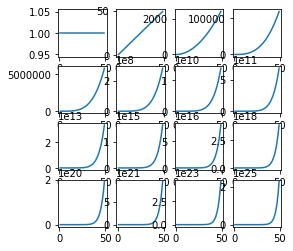

In [54]:
#### Problem 4.1 

def monomials(x, i):
    return np.exp(i*np.log(np.abs(x)))
    #return np.power(x, i) #This causes overflow

xs = np.arange(1,50,1)
figsize = plt.figaspect(1)
f, axs = plt.subplots(4, 4, figsize=figsize)
for i in np.arange(0,16):
    ys = monomials(xs, i)
    k = int(i / 4)
    j = int(i - 4*k)
    axs[k][j].plot(xs, ys)
    #axs[k][j].set_yscale('log')

#### Problem 4.2

$z = \left[L_0(x), L_1(x), L_2(x) \right]^T = \left[1, x, \frac{3}{2}x^2 - \frac{1}{2}\right]^T$. For the hypothesis with $w=[1,-1,1]^T$, we have

$h(x) = w^Tz = [1, -1, 1]\begin{bmatrix}1\\ x \\\frac{3}{2}x^2 - \frac{1}{2}\end{bmatrix} = 1-x+\frac{3}{2}x^2 - \frac{1}{2} = \frac{3}{2}x^2 - x + \frac{1}{2}$. 

This is degree-2 polynomial.

#### Problem 4.3

* (a) 

\begin{align*}
L_0(x) &= 1\\
L_1(x) &= x\\
L_2(x) &= \frac{3}{2}x^2 - \frac{1}{2}\\
L_3(x) &= \frac{5}{2}x^3 - \frac{3}{2}x\\
L_4(x) &= \frac{35}{8}x^4 - \frac{15}{4}x^2+\frac{3}{8}\\
L_5(x) &= \frac{63}{8}x^5 - \frac{35}{4}x^3+\frac{75}{40}x\\
\end{align*}

In [58]:
def Legendre(x, K):
    """Compute Legendre at x up to the Kth Legendre Polynomials
    """
    
    L0, L1 = 1, x
    if K < 0:
        raise ValueError("The order of Legendre polynomial can't be negative")
    
    if K == 0:
        return [L0]
    elif K == 1:
        return [L0, L1]

    Ls = [L0, L1]
    Lkm1, Lkm2 = L1, L0
    for k in range(2, K+1):
        Lk = (2*k-1)*x*Lkm1/k - (k-1)*Lkm2/k
        Ls.append(Lk)
        Lkm2 = Lkm1
        Lkm1 = Lk
    return Ls


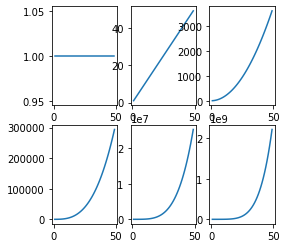

In [66]:
xs = np.arange(1,50,1)
figsize = plt.figaspect(1)
f, axs = plt.subplots(2, 3, figsize=figsize)
np_arrays = []
K=6

for x in xs:
    y = np.array(Legendre(x, K))
    np_arrays.append(y)
ys = np.vstack(np_arrays)

for i in np.arange(0,K):
    k = int(i / 3)
    j = int(i - 3*k)
    axs[k][j].plot(xs, ys[:,i])    

#### Problem 4.3 (b) 

We use induction. It's easy to see that when $k=0$ and $k=1$, $L_k(x)$ is a linear combination of monomials $x^k, x^{k-2},\dots$.

Suppose this is also true for $L_m(x)$ where $m\le k$, then when $m=k+1$, we have

\begin{align*}
L_{k+1}(x) &= \frac{2k-1}{k}xL_{k-1}(x) - \frac{k-1}{k}L_{k-2}(x)\\
&= \frac{2k-1}{k}x\left(a_0x^k+a_1x^{k-2}+\dots\right) - \frac{k-1}{k}\left(b_0x^{k-1}+b_1x^{k-3}+\dots\right)\\
&= \frac{2k-1}{k}\left(a_0x^{k+1}+a_1x^{k-1}+\dots\right) - \frac{k-1}{k}\left(b_0x^{k-1}+b_1x^{k-3}+\dots\right)\\
&= c_0x^{k+1}+c_1x^{k-1}+\dots\\
\end{align*}

So $L_{k+1}(x)$ is a linear combination of monomials $x^{k+1}, x^{k-1},\dots$. Thus

\begin{align*}
L_k(-x) = (-1)^kL_k(x)\\
\end{align*}


#### Problem 4.3 (c)

* $k=1$, $LHS=(x^2-1)\frac{dL_1(x)}{dx} = (x^2-1)$, and $RHS=xL_1(x) - L_0(x) = x^2 -1$. So the equation is correct when $k=1$.

* Suppose for all $m\le k$, we have $\frac{x^2-1}{m}\frac{dL_m(x)}{dx}=xL_m(x)-L_{m-1}(x)$.
* When $m=k+1$, we have (To make the display simple, we use $L_k$ to represent $L_k(x)$.

\begin{align*}
\frac{dL_{k+1}(x)}{dx} &= \frac{2(k+1)-1}{k+1}\left(L_k + x\frac{dL_k}{dx}\right) - \frac{k}{k+1}\frac{dL_{k-1}}{dx}\\
&= \frac{2k+1}{k+1}\left(L_k + x\frac{k}{x^2-1}\left(xL_k-L_{k-1}\right)\right) \\
&- \frac{k}{k+1}\frac{k-1}{x^2-1}\left(xL_{k-1} - L_{k-2}\right)\\
\end{align*}

Take $L_{k-2} = \frac{(2k-1)xL_{k-1} - kL_k}{k-1}$ into above equation we have

\begin{align*}
\frac{dL_{k+1}}{dx} &= \frac{2k+1}{k+1}\left(L_k + x\frac{k}{x^2-1}\left(xL_k-L_{k-1}\right)\right) \\
&- \frac{k}{k+1}\frac{k-1}{x^2-1}\left(xL_{k-1} - \frac{(2k-1)xL_{k-1} - kL_k}{k-1}\right)\\
\end{align*}

Multiply both sides with $x^2-1$, we have 

\begin{align*}
(x^2-1)\frac{dL_{k+1}}{dx} &= \frac{2k+1}{k+1}\left((x^2-1)L_k + kx\left(xL_k-L_{k-1}\right)\right) \\
&- \frac{k(k-1)}{k+1}\left(xL_{k-1} - \frac{(2k-1)xL_{k-1} - kL_k}{k-1}\right)\\
&= \frac{2k+1}{k+1}\left(\left((k+1)x^2-1\right)L_k - kxL_{k-1}\right) \\
&- \frac{k}{k+1}\left(\left(k-1\right)xL_{k-1} - \left(2k-1\right)xL_{k-1} +kL_k\right)\\
&= \frac{2k+1}{k+1}\left(\left((k+1)x^2-1\right)L_k - kxL_{k-1}\right)- \frac{k^2}{k+1}\left(L_k-xL_{k-1}\right)\\
&= \left((2k+1)x^2-(k+1)\right)L_k-kxL_{k-1}\\
&= x\left((2k+1)xL_k-kL_{k-1}\right)-(k+1)L_k\\
&= x(k+1)L_{k+1} - (k+1)L_k\\
\end{align*}

So we have
\begin{align*}
\frac{x^2-1}{k+1}\frac{dL_{k+1}}{dx} &=xL_{k+1} - L_k\\
\end{align*}

#### Problem 4.3 (d) 

From problem 3.4(c), we have 
\begin{align*}
(x^2-1)\frac{dL_{k}}{dx} &= k(xL_{k} - L_{k-1})\\
(x^2-1)\frac{dL_{k-1}}{dx} &= (k-1)(xL_{k-1} - L_{k-2})\\
\end{align*}

Take derivative w.r.t $x$ on $\frac{d}{dx}(x^2-1)\frac{dL_k}{dx}$, we have

\begin{align*}
\frac{d}{dx}(x^2-1)\frac{dL_k}{dx}&= \frac{d}{dx}\left(kxL_k - kL_{k-1}\right)  \\
&= k\left(L_k + x\frac{dL_k}{dx}\right) - k\frac{dL_{k-1}}{dx}\\
&= kL_k + k\left(x\frac{dL_k}{dx} - \frac{dL_{k-1}}{dx}\right)\\
\end{align*}


Replace the above computed $\frac{dL_{k}}{dx}$ and $\frac{dL_{k-1}}{dx}$, we obtain

\begin{align*}
\frac{d}{dx}(x^2-1)\frac{dL_k}{dx}&= kL_k + k\left(x\frac{dL_k}{dx} - \frac{dL_{k-1}}{dx}\right)\\
&= kL_k + \frac{k}{x^2-1}\left(xk(xL_{k} - L_{k-1}) - (k-1)(xL_{k-1} - L_{k-2})\right)\\
&= kL_k + \frac{k}{x^2-1}\left(kx^2L_{k} - \left((2k-1)xL_{k-1} - (k-1)L_{k-2}\right)\right)\\
&= kL_k + \frac{k}{x^2-1}\left(kx^2L_{k} - kL_k\right)\\
&= kL_k + k^2L_k\\
&= k(k+1)L_k\\
\end{align*}

* (e) It doesn't hurt if we can prove that the equation is correct for $l\le k$ for any given $k$. We use induction to prove this.
  * When $k=0$, $l$ can only be $0$, so we have $\int^1_{-1}dxL_0L_0 = \int^1_{-1}dx = 2 = \frac{2}{2k+1}$. The equation is thus correct when $k=0$.
  * Assume that the equation is correct when $k\le K$, let's look at the case when $k = K+1$.
  
\begin{align*}
L_{K+1}L_l &= \frac{2K+1}{K+1}xL_{K}L_l - \frac{K}{K+1}L_{K-1}L_l\\
\end{align*}

We need work out the integration of $\int^1_{-1}xL_{K}L_ldx$. Let's do it.

\begin{align*}
\int^1_{-1}xL_{K}L_ldx &= \frac{1}{2}(x^2-1)L_KL_l|^1_{-1} - \int^1_{-1}\frac{1}{2}(x^2-1)\left(L_KdL_l + L_ldL_K\right)dx\\
&= - \int^1_{-1}\frac{1}{2}(x^2-1)\left(L_KdL_l + L_ldL_K\right)dx
\end{align*}

Plug the result of problem (c), i.e. $\frac{x^2-1}{k}\frac{dL_{k}}{dx} =xL_{k} - L_{k-1}$ for $k=K$ and $k=l$ into above equation, we have

\begin{align*}
-2\int^1_{-1}xL_{K}L_ldx &= \int^1_{-1}(x^2-1)\left(L_KdL_l + L_ldL_K\right)dx\\
&= \int^1_{-1}\left(L_K(x^2-1)dL_l + L_l(x^2-1)dL_K\right)dx\\
&= \int^1_{-1}\left(L_K\left(lxL_l-lL_{l-1}\right) + L_l\left(KxL_K-KL_{K-1}\right)\right)dx\\
&= \int^1_{-1}\left(\left(l + K\right)xL_KL_l -\left(lL_KL_{l-1} + KL_lL_{K-1}\right)\right)dx\\
\end{align*}

Move the term with $xL_KL_l$ to the same side, we have
\begin{align*}
(2+K+l)\int^1_{-1}xL_{K}L_ldx &= \int^1_{-1}\left(lL_KL_{l-1} + KL_lL_{K-1}\right)dx\\
\end{align*}

Let's consider different cases of different $l$ values to compute the $\int^1_{-1}xL_{K}L_ldx$.

  * If $l \lt K-1$, then clearly by our assumptions using induction, we have $\int^1_{-1}xL_{K}L_ldx = 0$. Plug into the formula for $\int^1_{-1}L_{K+1}L_ldx$ we have 
  
\begin{align*}
\int^1_{-1}L_{K+1}L_ldx &= \frac{2K+1}{K+1}\int^1_{-1}xL_{K}L_l - \frac{K}{K+1}\int^1_{-1}L_{K-1}L_l\\
&= 0\\
\end{align*}

  * If $l = K-1$

\begin{align*}
\int^1_{-1}xL_{K}L_{K-1}dx &= \frac{1}{2K+1}\int^1_{-1}\left((K-1)L_KL_{K-2} + KL^2_{K-1}\right)dx\\
&= \frac{1}{2K+1}\int^1_{-1}KL^2_{K-1}dx\\
&= \frac{2K}{(2K-1)(2K+1)}\\
\end{align*}

Then we have

\begin{align*}
\int^1_{-1}L_{K+1}L_{K-1}dx &= \frac{2K+1}{K+1}\int^1_{-1}xL_{K}L_{K-1} - \frac{K}{K+1}\int^1_{-1}L_{K-1}L_{K-1}\\
&= \frac{2K+1}{K+1}\frac{2K}{(2K-1)(2K+1)} - \frac{K}{K+1}\frac{2}{2K-1}\\
&= 0\\
\end{align*}

  * If $l = K$
  
\begin{align*}
\int^1_{-1}xL_{K}L_Kdx &= \frac{1}{2(K+1)} \int^1_{-1}\left(KL_KL_{K-1} + KL_KL_{K-1}\right)dx\\
&= 0\\
\end{align*}

Then we have

\begin{align*}
\int^1_{-1}L_{K+1}L_Kdx &= \frac{2K+1}{K+1}\int^1_{-1}xL_{K}L_K - \frac{K}{K+1}\int^1_{-1}L_{K-1}L_K\\
&= 0\\
\end{align*}

  * If $l = K+1$
  
\begin{align*}
\int^1_{-1}xL_{K}L_{K+1}dx &= \frac{1}{2K+3} \int^1_{-1}\left((K+1)L_KL_K + KL_{K+1}L_{K-1}\right)dx\\
&= \frac{K+1}{2K+3}\frac{2}{2K+1}\\
\end{align*}

Then we have

\begin{align*}
\int^1_{-1}L_{K+1}L_{K+1}dx &= \frac{2K+1}{K+1}\int^1_{-1}xL_{K}L_{K+1} - \frac{K}{K+1}\int^1_{-1}L_{K-1}L_{K+1}\\
&= \frac{2K+1}{K+1}\frac{K+1}{2K+3}\frac{2}{2K+1}\\
&= \frac{2}{2K+3}\\
&= \frac{2}{2(K+1)+1}\\
\end{align*}  

Where the seond term on the right hand side is $0$ because we just proved when $l =K-1$.

We now conclude that the equation is correct for all $k$ and $l$.

#### Problem 4.4 TODO

#### Problem 4.5

If $\lambda \lt 0$, since $w^Tw$ is positive, to minimize the $E_{aug}(w)$, the learning algorithm will try to increase $|w|$ as much as possible. Then this corresponds to a soft order constraint of $w^Tw =\infty$.

#### Problem 4.6

For $\Gamma = I$ and $\lambda \gt 0$. 
* (a) Assume we have $\|w_{reg}\| \gt \|w_{lin}\|$, then $w^T_{reg}w_{reg}=\|w_{reg}\|^2 \gt \|w_{lin}\|^2 =w^T_{lin}w_{lin} $

\begin{align*}
E_{aug}(w_{reg}) &= E_{in}(w_{reg}) + \lambda w^T_{reg}w_{reg}\\
&\gt E_{in}(w_{reg}) + \lambda w^T_{lin}w_{lin}\\
&\ge E_{in}(w_{lin}) + \lambda w^T_{lin}w_{lin}\\
\end{align*}

The last step is valid because $w_{lin}$ minimizes $E_{in}(w)$, so we have $E_{in}(w_{lin}) \le E_{in}(w_{reg})$.

so we have $E_{aug}(w_{reg}) \gt E_{aug}(w_{lin})$. This is contradictary though because $w_{reg}$ is assumed to minimize $E_{aug}(w)$.

So we must have $\|w_{reg}\| \le \|w_{lin}\|$

* (b) For linear models, we have $w_{reg} = \left(Z^TZ+\lambda I\right)^{-1}Z^Ty$, then 

\begin{align*}
w^T_{reg}w_{reg} &= y^TZ\left(Z^TZ+\lambda I\right)^{-T} \left(Z^TZ+\lambda I\right)^{-1}Z^Ty\\
&= y^TZ\left(Z^TZ+\lambda I\right)^{-1} \left(Z^TZ+\lambda I\right)^{-1}Z^Ty\\
&= y^TZ\left(Z^TZ+\lambda I\right)^{-2} Z^Ty\\
&= u^T\left(Z^TZ+\lambda I\right)^{-2} u\\
\end{align*}

Where $u=Z^Ty$.

Now we show that $Z^TZ+\lambda I$ has the same eigenvectors with correspondingly larger eigenvalues as $Z^TZ$. 

Assume $v$ is an eigenvector of $Z^TZ$ and $\gamma$ is the corresponding eigenvalue, then we have 
$Z^TZv=\gamma v$.

\begin{align*}
(Z^TZ+\lambda I)v &= Z^TZv + lambda I v\\
&= \gamma v + \lambda v\\
&= (\gamma + \lambda)v\\
\end{align*}

So $v$ is also an eigenvector of $Z^Z+\lambda I$ and the corresponding eigenvalue is $\gamma + \lambda \gt \gamma$ since $\lambda \gt 0$. 

Also note, for any matrix $A$, the eigenvectors of $A^{-1}$ are the same as the eigenvectors of $A$, as $A^{-1}v = \lambda^{-1}v$. The eigenvalues of $A^{-1}$ are inverse of eigenvalues of $A$, i.e. $\lambda^{-1}$. Similarly, the eigenvectors of $A^{-2}$ are the same as the eigenvectors of $A$, but the eigenvalues of $A^{-2}$ are to the $-2$ power of eigenvalues of $A$, i.e. $\lambda^{-2}$.

Suppose the $v_1,v_2,\dots,v_{d+1}$ are the eigenvectors of $Z^TZ$ with corresponding eigenvalues of $\lambda_1, \lambda_2, \dots, \lambda_{d+1}$, then write $u$ in the eigenbasis of these vectors, we have $u = \sum^{d+1}_{k=1}c_kv_k$.

Let $A=Z^TZ+\lambda I$, then we have

\begin{align*}
w^T_{reg}w_{reg} &= u^TA^{-2}u \\
&= u^TA^{-2}(\sum^{d+1}_{k=1}c_kv_k)\\
&= u^T(\sum^{d+1}_{k=1}c_kA^{-2}v_k)\\
&= u^T(\sum^{d+1}_{k=1}c_k\lambda^{-2}_kv_k)\\
&= (\sum^{d+1}_{k=1}c_kv_k)(\sum^{d+1}_{k=1}c_k\lambda^{-2}_kv_k)\\
&=\sum^{d+1}_{k=1}\lambda^{-2}_kc^2_k\\
\end{align*}

The second to last equation is because the eigenvectors are orthogonal to each other. 

The $\lambda_k$s in the equation are eigenvalues of matrix $Z^TZ+\lambda I$, the corresponding matrix for $w_{lin}$ without weight decay is $Z^TZ$, and $w_{lin}^Tw_{lin} = u^T(Z^TZ)^{-2}u = \sum^{d+1}_{k=1}(\lambda^s_k)^{-2}c^2_k$. Assume the eigenvalues of matrix  $Z^TZ$ are $\lambda^s_1,\lambda^s_2,\dots,\lambda^s_{d+1}$, where $\lambda^s_k \le \lambda_k$ as proved above. So 
we have $w^T_{reg}w_{reg} \le w_{lin}^Tw_{lin}$ and achieve the equality when $\lambda = 0$.

#### Problem 4.7

For a matrix $Z$ that is $n\times d$, let the SVD of $Z=U\Gamma V^T$, where $\Gamma$ is $d\times d$ square diagnoal matrix, and $r$ of its diagonal elements are positive with the rest zeroes. $U$ is $n \times d$ and $V$ is $d \times d$. Also we have $U^TU=I_{d\times d}$ and $V^TV = VV^T = I_{d\times d}$. Note that $UU^T$ is not identity matrix. Let $Z^TZ$ have eigenvalues $\sigma^2_1, \sigma^2_2, \dots, \sigma^2_d$, define $a=U^Ty$, so we have

\begin{align*}
Z^TZ &= V\Gamma U^T U\Gamma V^T\\
&= V\Gamma^2V^T\\
\end{align*}

So the eigenvalues in $\sigma^2_1, \sigma^2_2, \dots, \sigma^2_d$ (there might be zeroes) are the elements on the diagonal of matrix $\Gamma^2$. 

\begin{align*}
H(\lambda) &= Z(Z^TZ+\lambda I)^{-1}Z^T \\
&= U\Gamma V^T \left(V\Gamma^2V^T + \lambda VV^T\right)^{-1} V\Gamma U^T\\
&= U\Gamma V^T \left(V\left(\Gamma^2 + \lambda I \right)V^T\right)^{-1} V\Gamma U^T\\
&= U\Gamma V^T V^{-T} \left(\Gamma^2 + \lambda I \right)^{-1} V^{-1} V\Gamma U^T\\
&= U\Gamma^2 \left(\Gamma^2 + \lambda I \right)^{-1}U^T\\
&= U\Lambda U^T\\
\end{align*}

Where the diagonal matrix $\Lambda$ has elements of $\frac{\sigma^2_i}{\sigma^2_i + \lambda}$ on its $i$th diagnoal. This is because the matrix $\Gamma^2 + \lambda I$ is always invertible when $\lambda \gt 0$.

Let $\lambda = 0$, we have $H= U\Gamma V^T \left(V\Gamma^2V^T \right)^{-1} V\Gamma U^T$, since $\Gamma$ may not have inverse, since some of its diagnoal entries might be zero. For its inverse, let the non-zero entries to be inverse, and let the zero entries to keep zeroes. We have $H= UU^T$.

Now it's time to compute $E_{in}(w_{reg})$, we have

\begin{align*}
E_{in}(w_{reg}) - E_{in}(w_{lin}) &= \frac{1}{N}y^T(I-H(\lambda))^2y - \frac{1}{N}y^T(I-H)^2y\\
&= \frac{1}{N}y^T\left[(I-H(\lambda))^2 - (I-H)^2\right]y\\
&= \frac{1}{N}y^T\left[(I-H(\lambda))^T(I-H(\lambda)) - (I-H)\right]y\\
&= \frac{1}{N}y^T\left[I-2H(\lambda)+H(\lambda)^2 - (I-H)\right]y\\
&= \frac{1}{N}y^T\left[-2H(\lambda)+H(\lambda)^2 + H\right]y\\
&= \frac{1}{N}y^T\left[-2U\Lambda U^T+ U\Lambda^2 U^T + UU^T\right]y\\
&= \frac{1}{N}y^TU\left[-2\Lambda + \Lambda^2  + I\right]U^Ty\\
&= \frac{1}{N}a^T(I-\Lambda)^2a\\
&=\frac{1}{N}\sum^d_{i=1}a^2_i\left(1-\frac{\sigma^2_i}{\sigma^2_i + \lambda}\right)^2\\
\end{align*}

We thus finished the proof.

#### Problem 4.8

In the augmented error minimization with $\Gamma = I$ and $\lambda \gt 0$, we have

\begin{align*}
E_{aug}(w) &= E_{in}(w) + \lambda w^T\Gamma^T\Gamma w\\
\end{align*}

Take derivative w.r.t. $w$, we have

\begin{align*}
\nabla E_{aug}(w) &= \nabla E_{in}(w) + \lambda \left(2\Gamma^T\Gamma\right)w\\
&= \nabla E_{in}(w) + 2\lambda w\\
\end{align*}

Then the update rule is 

\begin{align*}
w(t+1) &= w(t) - \eta \nabla E_{aug}(w)\\
&= w(t) - \eta \left(\nabla E_{in}(w) + 2\lambda w\right)\\
&= (1-2\eta\lambda)w(t) -  \eta \nabla E_{in}(w)\\
\end{align*}

This is the weight decay rule: $w(t)$ decays before being updated by the gradient of $E_{in}(w)$.

#### Problem 4.9

* (a) $\sqrt{\lambda}\Gamma$ has a dimension of $k \times (d+1)$, while $Z$ has a dimension of $n\times (d+1)$. $Z_{aug} = \begin{bmatrix}Z\\ \sqrt{\lambda}\Gamma\end{bmatrix}$ and $y=\begin{bmatrix}y\\ 0\end{bmatrix}$.

We also have $Z^T_{aug} = \begin{bmatrix}Z^T&\sqrt{\lambda}\Gamma^T\end{bmatrix}$

* (b) The least square solution with augmented data is

\begin{align*}
\left(Z^T_{aug}Z_{aug}\right)^{-1}Z^T_{aug}y_{aug} &= \left(\begin{bmatrix}Z^T&\sqrt{\lambda}\Gamma^T\end{bmatrix} \begin{bmatrix}Z\\ \sqrt{\lambda}\Gamma\end{bmatrix}\right)^{-1} \begin{bmatrix}Z^T&\sqrt{\lambda}\Gamma^T\end{bmatrix}\begin{bmatrix}y\\ 0\end{bmatrix}\\
&= \left(Z^TZ + \lambda\Gamma^T\Gamma\right)^{-1} Z^Ty\\
&= w_{reg}\\
\end{align*}

#### Problem 4.10

* (a) If $w^T_{lin}\Gamma^T\Gamma w_{lin} \le C$, then $w_{reg} = w_{lin}$
* (b) $E_{in}(w) = \frac{1}{N}\sum^N_{i=1}\left(y_i - w^Tx_i\right)^2$. $E_{in}(w)$ is thus a quadratic function of $w$, so the contours of constant $E_{in}$ are ellipsoids.  In this case, $w^T_{reg}\Gamma^T\Gamma w_{reg} = C$. First notice that the region $w^T\Gamma^T\Gamma w \le C$ is convex. When $w^T_{lin}\Gamma^T\Gamma w_{lin} \gt C$, $w_{lin}$ is outside of this region, as we move away from $w_{lin}$, the $E_{in}(w)$ increases (because $w_{lin}$ minimizes $E_{in}(w)$) but $w^T\Gamma^T\Gamma w$ decreases. The $w$ that satisfies $w^T\Gamma^T\Gamma w =C$ has the minimum possible $E_{in}(w)$ under constraint. So this is the solution $w_{reg}$.

* (c) From part (b), consider that case when $w^T_{lin}\Gamma^T\Gamma w_{lin} \gt C$, we have $w_{reg}^T\Gamma^T\Gamma w_{reg} = C$, let's replace the inequality constraint to equality constraint. 

Use Lagrange multiplier, we can instead minimize 

\begin{align*}
E_{in}(w) + \lambda \left(w^T\Gamma^T\Gamma w - C\right)\\
\end{align*}

Take derivative w.r.r. $w$, and let it equal to $0$, we have

\begin{align*}
\nabla E_{in}(w_{reg}) + 2\lambda_C \Gamma^T\Gamma w_{reg} &= 0\\
\Gamma^T\Gamma w_{reg} &= -\frac{1}{2\lambda_C}\nabla E_{in}(w_{reg}) \\
\end{align*}

Since we know that $w_{reg}^T\Gamma^T\Gamma w_{reg} = C$, (or take derivative w.r.t. $\lambda$), we have 

\begin{align*}
C &= -\frac{1}{2\lambda_C}w^T_{reg}\nabla E_{in}(w_{reg})\\
\lambda_C &= -\frac{1}{2C}w^T_{reg}\nabla E_{in}(w_{reg})
\end{align*}

Also note that when $w^T_{lin}\Gamma^T\Gamma w_{lin} \le C$, $w_{reg} = w_{lin}$, we have $\nabla E_{in}(w_{reg})= 0$, thus $\lambda_C = 0$.

Combine above results, we see that $w_{reg}$ minimizes $E_{in}(w) + \lambda_Cw^T\Gamma^T\Gamma w$. 

* (d) 
  * If $w^T_{lin}\Gamma^T\Gamma w_{lin} \le C$, we have $w_{reg} = w_{lin}$, and $\lambda_C = 0$.
  * If $w^T_{lin}\Gamma^T\Gamma w_{lin} \gt C$, Consider the norm to the surface of $w^T\Gamma^T\Gamma w = C$, it's $2\Gamma^T\Gamma w$.

We claim that the norm and the graident of $E_{in}$ have to be in the opposite directions at the point $w_{reg}$, which minimizes the augmented error. 

To prove this is correct, Let's look at the projection of $\nabla E_{in}(w)$ onto the norm. If this projection is along the same direction as norm, then we can move along the opposite of this projection, which will decrease $E_{in}(w)$ (because we move along some component of $-\nabla E_{in}(w))$ and decrease $w^T\Gamma^T\Gamma w$ (it's also the opposite of norm), which will move to region of $w^T\Gamma^T\Gamma w \lt C$. This contradicts our conclusion in part(b) that  the optimal $w_{reg}$ satisfies $w_{reg}^T\Gamma^T\Gamma w_{reg} = C$. So the projection of $\nabla E_{in}(w)$ must be at the opposite of the norm. 

Now suppose that in addition to the projection component, there's a non-zero component of $\nabla E_{in}(w)$ at $w_{reg}$ that is perpendicular to the norm. If we move along the opposite of this component, we stay on the surface, but we'll decrease the $E_{in}$, this contradicts with the assumption that $w_{reg}$ minimizes the agumented error.

Now we proved that the norm at $w_{reg}$, i.e. $\Gamma^T\Gamma w_{reg}$ is in opposite direction of the gradient of $E_{in}$ at $w_{reg}$, i.e. $\nabla E_{in}(w_{reg})$. From the derivation of part (c) we have following equation
  
\begin{align*}
\Gamma^T\Gamma w_{reg} &= -\frac{1}{2\lambda_C}\nabla E_{in}(w_{reg}) \\
\end{align*} 

This shows that we must have $\lambda_C \gt 0$.

  * If $w^T_{lin}\Gamma^T\Gamma w_{lin} \gt C$. 

Note that $w_{reg}$ depends on $C$. We first work out $\frac{d\nabla E_{in}(w_{reg})}{dC}$. We know that $E_{in}(w_{reg}) = \frac{1}{N}\|Xw-Y\|^2 = \frac{1}{N}(Xw-Y)^T(Xw-Y) = \frac{1}{N}(w^TX^TXw - w^TX^Ty - y^TX^Tw + y^Ty)$

\begin{align*}
\nabla E_{in}(w_{reg}) &=  \frac{2}{N}\left(X^TXw -X^Ty\right)\\
w^T_{reg}\nabla E_{in}(w_{reg}) &=  \frac{2}{N}\left(w^T_{reg}X^TXw_{reg} - w^T_{reg}X^Ty\right)\\
\frac{d\left(w^T_{reg}\nabla E_{in}(w_{reg})\right)}{dC} &= \frac{2}{N}\frac{dw}{dC}|_{w_{reg}}\left(2X^TXw_{reg} -X^Ty\right)\\
\end{align*}

Also take derivative w.r.t. $C$ on surface $w^T\Gamma^T\Gamma w = C$, we have $2\Gamma^T\Gamma w \frac{dw}{dC} = 1$, at $w = w_{reg}$, we have $w_{reg}^T\Gamma^T\Gamma w_{reg} = C$ when $w^T_{lin}\Gamma^T\Gamma w_{lin} \gt C$, that is $2w_{reg}^T\Gamma^T\Gamma w_{reg}\frac{dw}{dC}|_{w_{reg}}=1$, we obtain
$\frac{dw}{dC}|_{w_{reg}} = \frac{1}{2C}w^T_{reg}$.


Let's now take derivative of $\lambda_C$ w.r.t. $C$, we have

\begin{align*}
\frac{d\lambda_C}{dC} &= \frac{1}{2C^2}w^T_{reg}\nabla E_{in}(w_{reg}) -\frac{1}{2C}\frac{d\left(w^T_{reg}\nabla E_{in}(w_{reg})\right)}{dC} \\
&= \frac{1}{2C^2}\frac{2}{N}\left(w^T_{reg}X^TXw_{reg} - w^T_{reg}X^Ty\right) -\frac{1}{2C}\frac{2}{N}\frac{dw}{dC}|_{w_{reg}}\left(2X^TXw_{reg} -X^Ty\right) \\
&= \frac{1}{NC^2}\left(w^T_{reg}X^TXw_{reg} - w^T_{reg}X^Ty\right) -\frac{1}{2C}\frac{2}{N}\frac{1}{2C}w^T_{reg}\left(2X^TXw_{reg} -X^Ty\right) \\
&= \frac{1}{NC^2}\left(w^T_{reg}X^TXw_{reg} - w^T_{reg}X^Ty\right) -\frac{1}{NC^2}\left(w^T_{reg}X^TXw_{reg} - \frac{1}{2}w^T_{reg}X^Ty\right) \\
&= -\frac{1}{2NC^2}w^T_{reg}X^Ty\\
\end{align*}

From previous derivation, $\lambda_C = -\frac{1}{2C}w^T_{reg}\nabla E_{in}(w_{reg})$, we know that $\lambda_C \gt 0$, so we have  $w^T_{reg}\nabla E_{in}(w_{reg}) \lt 0$ because $C \gt 0$. 

\begin{align*}
w^T_{reg}\nabla E_{in}(w_{reg}) &= \frac{2}{N}\left(w^T_{reg}X^TXw_{reg} - w^T_{reg}X^Ty\right)\\
w^T_{reg}X^TXw_{reg} &\lt w^T_{reg}X^Ty\\
\end{align*}

Then
\begin{align*}
\frac{d\lambda_C}{dC} &= -\frac{1}{2NC^2}w^T_{reg}X^Ty\\
&\lt -\frac{1}{2NC^2}w^T_{reg}X^TXw_{reg}\\
&\le 0\\
\end{align*}

Where the last inequation comes from the fact that $X^TX$ is positive semi-definite matrix. 

  * Proof: For any non-zero vector $v$, $v^TX^TXv = (Xv)^T(Xv) \ge 0$ since $Xv$ is a vector.
  
So we have proved that $\frac{d\lambda_C}{dC} \lt 0$, $\lambda_C$ is a strictly decreasing function of $C$ when $w^T_{lin}\Gamma^T\Gamma w_{lin} \gt C$.

#### Problem 4.11

* (a) 

\begin{align*}
w_{lin} &= (Z^TZ)^{-1}Z^Ty\\
&= (Z^TZ)^{-1}Z^T(Zw_f+\epsilon)\\
&= (Z^TZ)^{-1}Z^TZw_f+ (Z^TZ)^{-1}Z^T\epsilon\\
&= w_f+ (Z^TZ)^{-1}Z^T\epsilon\\
\end{align*}

The average function $\bar{g}$ is:

\begin{align*}
\bar{g}(x) &= E_{\mathcal{D}}[g(x)]\\
&= E_{\mathcal{D}}[w^T_{lin}x]\\
&= E_{\mathcal{D}}[\left(w_f+ (Z^TZ)^{-1}Z^T\epsilon\right)^Tx]\\
&= E_{Z,\epsilon}[w^T_fx + \epsilon^T Z(Z^TZ)^{-T} x]\\
&= E_{Z,\epsilon}[w^T_fx] + E_{Z,\epsilon}[\epsilon^T Z(Z^TZ)^{-1} x]\\
&= w^T_fx + E_{Z,\epsilon}[\epsilon^T]E_{Z,\epsilon}[Z(Z^TZ)^{-1}]x\\
&= w^T_fx\\
\end{align*}

So the average function $\bar{g}(x)$ is exactly the target function $f(x)$, i.e. $\bar{g}(x) = f(x)$. 
We can compute the bias as: 

\begin{align*}
bias &= E_{\mathcal{D},x}[\left(\bar{g}(x) - f(x)\right)^2]\\
&= E_{\mathcal{D},x}[\left(w^T_fx - w^T_fx\right)^2]\\
&= 0\\
\end{align*}

* (b) Now we can compute variance

\begin{align*}
var &= E_{\mathcal{D},x}\left[\left(g^{\mathcal{D}}(x)-\bar{g}(x)\right)^2\right]\\
&= E_{Z, \epsilon,x}\left[\left(w^T_{lin}\Phi(x)-w^T_f\Phi(x)\right)^2\right]\\
&= E_{Z, \epsilon,x}\left[\left(((Z^TZ)^{-1}Z^T\epsilon)^T\Phi(x)\right)^2\right]\\
&= E_{Z, \epsilon,x}\left[\left(\epsilon^T Z(Z^TZ)^{-1}\Phi(x)\right)^2\right]\\
&= E_{Z, \epsilon,x}\left[\left(\epsilon^T Z(Z^TZ)^{-1}\Phi(x)\right)^T\left(\epsilon^T Z(Z^TZ)^{-1}\Phi(x)\right)\right]\\
&= E_{Z, \epsilon,x}\left[\Phi^T(x)(Z^TZ)^{-1}Z^T\epsilon\epsilon^T Z(Z^TZ)^{-1}\Phi(x)\right]\\
&= E_{Z, x}E_{\epsilon}\left[\Phi^T(x)(Z^TZ)^{-1}Z^T\epsilon\epsilon^T Z(Z^TZ)^{-1}\Phi(x)\right]\\
&= E_{Z, x}E_{\epsilon}\left[trace\left(\Phi^T(x)(Z^TZ)^{-1}Z^T\epsilon\epsilon^T Z(Z^TZ)^{-1}\Phi(x)\right)\right]\\
&= E_{Z, x}E_{\epsilon}\left[trace\left(Z(Z^TZ)^{-1}\Phi(x)\Phi^T(x)(Z^TZ)^{-1}Z^T\epsilon\epsilon^T \right)\right]\\
&= E_{Z, x}trace\left[E_{\epsilon}\left(Z(Z^TZ)^{-1}\Phi(x)\Phi^T(x)(Z^TZ)^{-1}Z^T\epsilon\epsilon^T \right)\right]\\
&= E_{Z, x}trace\left[E_{\epsilon}\left(Z(Z^TZ)^{-1}\Phi(x)\Phi^T(x)(Z^TZ)^{-1}Z^T\right)E_{\epsilon}\left(\epsilon\epsilon^T \right)\right]\\
&= \sigma^2E_{Z, x}trace\left[\left(Z(Z^TZ)^{-1}\Phi(x)\Phi^T(x)(Z^TZ)^{-1}Z^T\right)\right]\\
&= \sigma^2E_{Z, x}trace\left[\left((Z^TZ)^{-1}Z^TZ(Z^TZ)^{-1}\Phi(x)\Phi^T(x)\right)\right]\\
&= \sigma^2E_{Z, x}trace\left[\left((Z^TZ)^{-1}\Phi(x)\Phi^T(x)\right)\right]\\
&= \sigma^2E_{Z}E_xtrace\left[\left((Z^TZ)^{-1}\Phi(x)\Phi^T(x)\right)\right]\\
&= \sigma^2E_{Z}traceE_x\left[\left((Z^TZ)^{-1}\Phi(x)\Phi^T(x)\right)\right]\\
&= \sigma^2E_{Z}trace\left[E_x\left[(Z^TZ)^{-1}\right]E_x\left[\Phi(x)\Phi^T(x)\right]\right]\\
&= \sigma^2E_{Z}trace\left[(Z^TZ)^{-1}\Sigma_{\Phi}\right]\\
&= \sigma^2trace\left[\Sigma_{\Phi}E_{Z}(Z^TZ)^{-1}\right]\\
&= \frac{\sigma^2}{N}trace\left[\Sigma_{\Phi}E_{Z}(\frac{1}{N}Z^TZ)^{-1}\right]\\
\end{align*}

* (c) 

\begin{align*}
\frac{1}{N}Z^TZ &= \frac{1}{N}\sum^N_{n=1}\Phi(x_n)\Phi^T(x_n)\\
\end{align*}

This is the in-sample estimate of $\Sigma_{\Phi}$, by the law of large numbers, we have $\frac{1}{N}Z^TZ = \Sigma_{\Phi} + o(1)$. The $\Sigma_{\Phi}$ has a dimension of $(Q+1)\times (Q+1)$ for a given $x$, so we have

\begin{align*}
var &= \frac{\sigma^2}{N}trace\left[\Sigma_{\Phi}E_{Z}(\frac{1}{N}Z^TZ)^{-1}\right]\\
&\approx \frac{\sigma^2}{N}trace\left[\Sigma_{\Phi}(\Sigma_{\Phi}+o(1))^{-1}\right]\\
&= \frac{\sigma^2}{N}traceI_{(Q+1)\times (Q+1)}\\
&= \frac{\sigma^2 (Q+1)}{N}\\
\end{align*}

So for the well specified linear model, the bias is zero and the variance is increasing as the model gets larger (i.e. $Q$ increases) but decreasing in $N$. 

#### Problem 4.12

* (a) 

\begin{align*}
w_{reg} &= \left(Z^TZ + \lambda I\right)^{-1}Z^Ty\\
&= \left(Z^TZ + \lambda I\right)^{-1}Z^T\left(Zw_f+\epsilon\right)\\
&= \left(Z^TZ + \lambda I\right)^{-1}Z^TZw_f+\left(Z^TZ + \lambda I\right)^{-1}Z^T\epsilon\\
&= \left(I - \left(Z^TZ + \lambda I\right)^{-1}\lambda \right)w_f+\left(Z^TZ + \lambda I\right)^{-1}Z^T\epsilon\\
&= w_f - \lambda\left(Z^TZ + \lambda I\right)^{-1}w_f +\left(Z^TZ + \lambda I\right)^{-1}Z^T\epsilon\\
\end{align*}

The average function $\bar{g}$ is:

\begin{align*}
\bar{g}(x) &= E_{\mathcal{D}}[g(x)]\\
&= E_{\mathcal{D}}[w^T_{reg}x]\\
&= E_{\mathcal{D}}\left[\left(w_f- \lambda\left(Z^TZ + \lambda I\right)^{-1}w_f +\left(Z^TZ + \lambda I\right)^{-1}Z^T\epsilon\right)^Tx\right]\\
&= E_{Z,\epsilon}\left[w^T_fx - \lambda w^T_f\left(Z^TZ + \lambda I\right)^{-1}x + \epsilon^T Z(Z^TZ+ \lambda I)^{-1} x\right]\\
&= E_{Z,\epsilon}[w^T_fx- \lambda w^T_f\left(Z^TZ + \lambda I\right)^{-1}x] + E_{Z,\epsilon}[\epsilon^T Z(Z^TZ+ \lambda I)^{-1} x]\\
&= w^T_fx - \lambda E_Z\left[ w^T_f\left(Z^TZ + \lambda I\right)^{-1}\right]x + E_{Z,\epsilon}[\epsilon^T]E_{Z,\epsilon}[Z(Z^TZ+ \lambda I)^{-1}]x\\
&= w^T_fx- \lambda w^T_fE_Z\left(Z^TZ + \lambda I\right)^{-1}x\\
\end{align*}

Note that $\frac{1}{N}Z^TZ = \frac{1}{N}\sum^N_{n=1}\Phi(x_n)\Phi^T(x_n)$ is the in-sample estimate of $\Sigma_{\Phi} = E[\Phi(x)\Phi^T(x)] = I_{(d+1)\times(d+1)}$, so by the law of large numbers, $\frac{1}{N}Z^TZ = \Sigma_{\Phi} + o(1)$, so $\frac{1}{N}(Z^TZ + \lambda I) = \Sigma_{\Phi} + \frac{1}{N}\lambda I + o(1) = (1+\frac{\lambda}{N})I + o(1)$.

Then when $N$ is large

\begin{align*}
E_Z\left(Z^TZ + \lambda I\right)^{-1} &= \frac{1}{N}E_Z\left(\frac{1}{N}(Z^TZ + \lambda I)\right)^{-1} \\
&= \frac{1}{N}(1+\frac{\lambda}{N})^{-1}I \\
&= \frac{1}{\lambda + N}I \\
\end{align*}

 

We can compute the bias as: 

\begin{align*}
bias &= E_{\mathcal{D},x}[\left(\bar{g}(x) - f(x)\right)^2]\\
&= E_{\mathcal{D},x}\left[\left(w^T_f\Phi(x) - \lambda w^T_fE_Z\left(Z^TZ + \lambda I\right)^{-1}\Phi(x)- w^T_f\Phi(x)\right)^2\right]\\
&= E_{\mathcal{D},x}\left[\left(\lambda w^T_fE_Z\left(Z^TZ + \lambda I\right)^{-1}\Phi(x)\right)^2\right]\\
&= \lambda^2 E_{\mathcal{D},x}\left[\Phi^T(x)E_Z\left(Z^TZ + \lambda I\right)^{-T}w_f w^T_fE_Z\left(Z^TZ + \lambda I\right)^{-1}\Phi(x)\right]\\
&= \lambda^2 E_{\mathcal{D},x}\left[\Phi^T(x)\frac{1}{\lambda + N}I w_f w^T_f\frac{1}{\lambda + N}I \Phi(x)\right]\\
&= \frac{\lambda^2}{(\lambda + N)^2} E_{\mathcal{D},x}\left[\Phi^T(x)w_f w^T_f\Phi(x)\right]\\
&= \frac{\lambda^2}{(\lambda + N)^2}  E_{\mathcal{D},x}trace\left[\Phi^T(x)w_f w^T_f\Phi(x)\right]\\
&= \frac{\lambda^2}{(\lambda + N)^2}  E_{\mathcal{D},x}trace\left[\Phi(x)\Phi^T(x)w_f w^T_f\right]\\
&= \frac{\lambda^2}{(\lambda + N)^2} trace E_{\mathcal{D},x}\left[\Phi(x)\Phi^T(x)w_f w^T_f\right]\\
&= \frac{\lambda^2}{(\lambda + N)^2} trace \left[E_{\mathcal{D},x}[\Phi(x)\Phi^T(x)]w_f w^T_f\right]\\
&= \frac{\lambda^2}{(\lambda + N)^2} trace [Iw_f w^T_f]\\
&= \frac{\lambda^2}{(\lambda + N)^2} trace [w_f w^T_f]\\
&= \frac{\lambda^2}{(\lambda + N)^2} \|w_f\|^2\\
\end{align*}

Where we have used the assumption that the input probability satisfies $E_{x} \left[\Phi(x)\Phi^T(x)\right]= I $

Also note, that $w_f w^T_f$ is a $(d+1)\times (d+1)$ matrix, its trace is just $\|w_f\|^2$.

#### Problem 4.12 (b)

\begin{align*}
var &= E_{\mathcal{D}, x}\left[(g^{\mathcal{D}}(x) - \bar{g}(x))^2\right]\\
&= E_{\mathcal{D}, x}\left[\left(w^T_{reg}\Phi(x) - (w^T_f\Phi(x) - \lambda w^T_fE_Z\left(Z^TZ + \lambda I\right)^{-1}\Phi(x) \right)^2\right]\\
&= E_{\mathcal{D}, x}\left[\left((w^T_f-w^T_f\lambda(Z^TZ+\lambda I)^{-1}+\epsilon^TZ(Z^TZ+\lambda I)^{-1})\Phi(x) - (w^T_f\Phi(x) - \lambda w^T_fE_Z\left(Z^TZ + \lambda I\right)^{-1}\Phi(x) \right)^2\right]\\
&= E_{\mathcal{D}, x}\left[\left((-w^T_f\lambda(Z^TZ+\lambda I)^{-1}+\epsilon^TZ(Z^TZ+\lambda I)^{-1})\Phi(x) - ( - \lambda w^T_fE_Z\left(Z^TZ + \lambda I\right)^{-1}\Phi(x) \right)^2\right]\\
\end{align*}

To the first oder in $\frac{1}{N}$, we know from 4.12 (a) that $\frac{1}{N}(Z^TZ + \lambda I) = (1+\frac{\lambda}{N})I + o(1)$ and $E_Z\left(Z^TZ + \lambda I\right)^{-1} = \frac{1}{\lambda + N}I$

So we have

\begin{align*}
var &= E_{\mathcal{D}, x}\left(\epsilon^TZ(Z^TZ+\lambda I)^{-1}\Phi(x)\right)^2\\
&= E_{\mathcal{D}, x}\left(\Phi^T(x)(Z^TZ+\lambda I)^{-1}Z^T\epsilon\epsilon^TZ(Z^TZ+\lambda I)^{-1}\Phi(x)\right)\\
&= E_{\mathcal{D}, x}trace\left(\Phi^T(x)(Z^TZ+\lambda I)^{-1}Z^T\epsilon\epsilon^TZ(Z^TZ+\lambda I)^{-1}\Phi(x)\right)\\
&= E_{\mathcal{D}, x}trace\left(Z(Z^TZ+\lambda I)^{-1}\Phi(x)\Phi^T(x)(Z^TZ+\lambda I)^{-1}Z^T\epsilon\epsilon^T\right)\\
&= trace E_{\mathcal{D}, x}\left(Z(Z^TZ+\lambda I)^{-1}\Phi(x)\Phi^T(x)(Z^TZ+\lambda I)^{-1}Z^T\epsilon\epsilon^T\right)\\
&= trace E_{\mathcal{D}, x}\left(Z(Z^TZ+\lambda I)^{-1}\Phi(x)\Phi^T(x)(Z^TZ+\lambda I)^{-1}Z^T\right)E_{\mathcal{D}, x}\left(\epsilon\epsilon^T\right)\\
&= \sigma^2 trace E_{\mathcal{D}, x}\left(Z(Z^TZ+\lambda I)^{-1}\Phi(x)\Phi^T(x)(Z^TZ+\lambda I)^{-1}Z^T\right)\\
&= \sigma^2  E_{\mathcal{D}, x}trace\left(Z(Z^TZ+\lambda I)^{-1}\Phi(x)\Phi^T(x)(Z^TZ+\lambda I)^{-1}Z^T\right)\\
&= \sigma^2  E_{\mathcal{D}, x}trace\left((Z^TZ+\lambda I)^{-1}Z^TZ(Z^TZ+\lambda I)^{-1}\Phi(x)\Phi^T(x)\right)\\
&= \sigma^2 trace E_{\mathcal{D}}\left((Z^TZ+\lambda I)^{-1}Z^TZ(Z^TZ+\lambda I)^{-1}\right) E_{ x}\left(\Phi(x)\Phi^T(x)\right)\\
&= \sigma^2 trace E_{\mathcal{D}}\left((Z^TZ+\lambda I)^{-1}Z^TZ(Z^TZ+\lambda I)^{-1}\right)\\
&= \sigma^2  E_{\mathcal{D}}trace\left((Z^TZ+\lambda I)^{-1}Z^TZ(Z^TZ+\lambda I)^{-1}\right)\\
&= \sigma^2  E_{\mathcal{D}}trace\left(Z(Z^TZ+\lambda I)^{-1}(Z^TZ+\lambda I)^{-1}Z^T\right)\\
\end{align*}

To first order in $\frac{1}{N}$, we have $Z^TZ = NI$, take this into variance expression, we obtain

\begin{align*}
var &= \sigma^2  E_{\mathcal{D}}trace\left(Z(Z^TZ+\lambda I)^{-1}(Z^TZ+\lambda I)^{-1}Z^T\right)\\
&= \frac{\sigma^2}{N}  E_{\mathcal{D}}trace\left(Z(Z^TZ+\lambda I)^{-1}Z^TZ(Z^TZ+\lambda I)^{-1}Z^T\right)\\
&= \frac{\sigma^2}{N}  E_{\mathcal{D}}[trace(H^2(\lambda))]\\
\end{align*}

#### Problem 4.13

\begin{align*}
H(\lambda) &= Z(Z^TZ+\lambda I)^{-1}Z^T\\
H^2(\lambda) &= Z(Z^TZ+\lambda I)^{-1}Z^TZ(Z^TZ+\lambda I)^{-1}Z^T\\
\end{align*}

Also from exercise 3.3 (d), when $\lambda=0$, $H(\lambda) = H$, and we have $trace(H) = \tilde{d}+1$, and $H^2=H$, so $trace(H^2) = \tilde{d}+1$.

* (a) When $\lambda = 0$, we have $trace(H(\lambda)) = trace\left(Z(Z^TZ)^{-1}Z^T\right) = trace(H) = \tilde{d}+1$
  * (i) $d_{eff}(\lambda) = 2trace(H(\lambda)) - trace(H^2(\lambda)) = 2trace(H) - trace(H^2) = trace(H) = \tilde{d} + 1$.
  * (ii) $d_{eff}(\lambda)= trace(H(\lambda)) = trace(H) = \tilde{d} + 1$
  * (iii) $d_{eff}(\lambda)= trace(H^2(\lambda)) = trace(H) = \tilde{d} + 1$
  
* (b) When $\lambda \gt 0$. Let the SVD of $Z=U\Gamma V^T$, where $U$ is $n\times (\tilde{d}+1)$ matrix, $U^TU=I_{(\tilde{d} + 1) \times (\tilde{d}+1)}$ and $V$ is $(\tilde{d} + 1) \times (\tilde{d}+1)$, $V^TV=VV^T=I_{(\tilde{d} + 1) \times (\tilde{d}+1)}$, and $\Gamma$ is $(\tilde{d} + 1) \times (\tilde{d}+1)$ diagonal matrix. We have

\begin{align*}
Z^TZ &= V\Gamma U^T U\Gamma V^T\\
&= V\Gamma^2V^T\\
H(\lambda) &= Z(Z^TZ+\lambda I)^{-1}Z^T\\
&= U\Gamma V^T\left(V\Gamma^2V^T+\lambda I\right)^{-1}V\Gamma U^T\\
&= U\Gamma V^T\left(V(\Gamma^2+\lambda I)V^T\right)^{-1}V\Gamma U^T\\
&= U\Gamma V^TV^{-T}(\Gamma^2+\lambda I)^{-1}V^{-1}V\Gamma U^T\\
&= U\Gamma^2(\Gamma^2+\lambda I)^{-1}U^T\\
&= U\Sigma U^T\\
H^2(\lambda) &= (U\Sigma U^T)^TU\Sigma U^T\\
&= U\Sigma^2U^T\\
\end{align*}

Where $\Sigma = \Gamma^2(\Gamma^2+\lambda I)^{-1}$, let $\sigma_1, \sigma_2, \dots, \sigma_d$ be the eigenvalues of matrix $\Gamma$.

So the traces are

\begin{align*}
trace(H(\lambda)) &= trace(U\Sigma U^T) \\
&= trace(U^TU\Sigma) \\
&= trace(\Sigma)\\
&= \sum^{\tilde{d}+1}_{i=1}\frac{\sigma^2_i}{\sigma^2_i+\lambda}\\
\end{align*}

\begin{align*}
trace(H^2(\lambda)) &= trace(U\Sigma^2 U^T) \\
&= trace(U^TU\Sigma^2) \\
&= trace(\Sigma^2)\\
&= \sum^{\tilde{d}+1}_{i=1}\frac{\sigma^4_i}{(\sigma^2_i+\lambda)^2}\\
\end{align*}

  * (i) 

\begin{align*}
d_{eff}(\lambda) &= 2trace(H(\lambda)) - trace(H^2(\lambda)) \\
&= \sum^{\tilde{d}+1}_{i=1}\frac{2\sigma^2_i}{\sigma^2_i+\lambda} - \frac{\sigma^4_i} {(\sigma^2_i+\lambda)^2}\\
&= \sum^{\tilde{d}+1}_{i=1}\frac{\sigma^4_i+2\lambda\sigma^2_i} {(\sigma^2_i+\lambda)^2}\\
&\le \sum^{\tilde{d}+1}_{i=1}1\\
&= \tilde{d}+1\\
\end{align*}

  * (ii)

\begin{align*}
d_{eff}(\lambda) &=trace(H(\lambda))\\
&= \sum^{\tilde{d}+1}_{i=1}\frac{\sigma^2_i}{\sigma^2_i+\lambda}\\
&\le \sum^{\tilde{d}+1}_{i=1}1\\
&= \tilde{d}+1\\
\end{align*}

  * (iii)

\begin{align*}
d_{eff}(\lambda) &=trace(H^2(\lambda))\\
&= \sum^{\tilde{d}+1}_{i=1}\frac{\sigma^4_i} {(\sigma^2_i+\lambda)^2}\\
&\le \sum^{\tilde{d}+1}_{i=1}1\\
&= \tilde{d}+1\\
\end{align*}

Also, it's clear that they are all larger or equal to zero. So we have finished the proof.

#### Problem 4.14 

\begin{align*}
E_{in} &= \frac{1}{N}\|y-Xw\|^2\\
&= \frac{1}{N}\|y-H(\lambda)y\|^2\\
&= \frac{1}{N}\|\left(I-H(\lambda)\right)y\|^2\\
&= \frac{1}{N}\|\left(I-H(\lambda)\right)(f+\epsilon)\|^2\\
&= \frac{1}{N}(f+\epsilon)^T\left(I-H(\lambda)\right)^T\left(I-H(\lambda)\right)(f+\epsilon)\\
&= \frac{1}{N}(f^T+\epsilon^T)\left(I-H(\lambda)\right)^2(f+\epsilon)\\
&= \frac{1}{N} f^T \left(I-H(\lambda)\right)^2 f +  \frac{1}{N}f^T\left(I-H(\lambda)\right)^2\epsilon +  \frac{1}{N}\\epsilon^T\left(I-H(\lambda)\right)^2f +  \frac{1}{N}\epsilon^T\left(I-H(\lambda)\right)^2\epsilon\\
\end{align*}

Take expectation w.r.t. $\epsilon$, we have

\begin{align*}
E_{\epsilon}[E_{in}] &= \frac{1}{N} f^T \left(I-H(\lambda)\right)^2 f +  \frac{1}{N}E_{\epsilon}\left[\epsilon^T\left(I-H(\lambda)\right)^2\epsilon\right]\\
\end{align*}

We need work out the expectation of the second term, we have

\begin{align*}
E_{\epsilon}\left[\epsilon^T\left(I-H(\lambda)\right)^2\epsilon\right] &= E_{\epsilon}trace\left[\epsilon^T\left(I-H(\lambda)\right)^2\epsilon\right]\\
&= E_{\epsilon}trace\left[\epsilon\epsilon^T\left(I-H(\lambda)\right)^2\right]\\
&= traceE_{\epsilon}\left[\epsilon\epsilon^T\left(I-H(\lambda)\right)^2\right]\\
&= traceE_{\epsilon}[\epsilon\epsilon^T]E_{\epsilon}\left(I-H(\lambda)\right)^2\\
&= trace\sigma^2\left(I-H(\lambda)\right)^2\\
&= \sigma^2trace\left(I-H(\lambda)\right)^2\\
\end{align*}

So the final expectation of 

\begin{align*}
E_{\epsilon}[E_{in}] &= \frac{1}{N} f^T \left(I-H(\lambda)\right)^2 f +  \frac{1}{N}E_{\epsilon}\left[\epsilon^T\left(I-H(\lambda)\right)^2\epsilon\right]\\
&= \frac{1}{N} f^T \left(I-H(\lambda)\right)^2 f +  \frac{1}{N}\sigma^2trace\left(I-H(\lambda)\right)^2\\
&= \frac{1}{N} f^T \left(I-H(\lambda)\right)^2 f +  \frac{1}{N}\sigma^2trace\left(I-2H(\lambda)+H^2(\lambda)\right)\\
&= \frac{1}{N} f^T \left(I-H(\lambda)\right)^2 f +  \frac{1}{N}\sigma^2\left(N -\left(2traceH(\lambda)-trace(H^2(\lambda))\right)\right)\\
&= \frac{1}{N} f^T \left(I-H(\lambda)\right)^2 f +  \sigma^2(1 -\frac{d_{eff}}{N})\\
\end{align*}

* (a) If the noise was not overfit, the term involving $\sigma^2$ should equal to $\sigma^2$ because 
$E_{\epsilon}[E_{in}]$ is an estimate of the out-of-sample error, which should have constant term $\sigma^2$. When the noise was overfit, $E_{\epsilon}[E_{in}]$ underestimates the out-of-sample error. 

* (b) Hence, the degree to which the noise has been overfit is $\frac{\sigma^2d_{eff}}{N}$. It says that when $d_{eff}$ increases, the overfit to noise increases, when $N$ increases, the overift decreases. $d_{eff}$ acts as an effective number of parameters.

#### Problem 4.15 

* (a) Let $\tilde{Z} = Z\Gamma^{-1}$, then $Z=\tilde{Z}\Gamma$, also assume $\Gamma$ is square and invertible, we have

\begin{align*}
H(\lambda) &= Z(Z^TZ+\lambda \Gamma^T\Gamma)^{-1}Z^T\\
&= \tilde{Z}\Gamma((\tilde{Z}\Gamma)^T\tilde{Z}\Gamma+\lambda \Gamma^T\Gamma)^{-1}(\tilde{Z}\Gamma)^T\\
&= \tilde{Z}\Gamma(\Gamma^T\tilde{Z}^T\tilde{Z}\Gamma+\Gamma^T\lambda \Gamma)^{-1}\Gamma^T\tilde{Z}^T\\
&= \tilde{Z}\Gamma\left(\Gamma^T(\tilde{Z}^T\tilde{Z}+\lambda I) \Gamma\right)^{-1}\Gamma^T\tilde{Z}^T\\
&= \tilde{Z}\Gamma\Gamma^{-1}\left(\tilde{Z}^T\tilde{Z}+\lambda I \right)^{-1}\Gamma^{-T}\Gamma^T\tilde{Z}^T\\
&= \tilde{Z}\left(\tilde{Z}^T\tilde{Z}+\lambda I \right)^{-1}\tilde{Z}^T\\
\end{align*}

Now we can proceed similar with problem 4.13 (i), we let the SVD of $\tilde{Z}=U\Lambda V^T$, where $U$ is $n\times (d+1)$ matrix, $U^TU=I_{(d + 1) \times (d+1)}$ and $V$ is $(d + 1) \times (d+1)$, $V^TV=VV^T=I_{(d + 1) \times (d+1)}$, and $\Lambda$ is $(d + 1) \times (d+1)$ diagonal matrix with entries $s_0,s_1,\dots,s_{d}$. We have

\begin{align*}
\tilde{Z}^T\tilde{Z} &= V\Lambda U^T U\Lambda V^T\\
&= V\Lambda^2V^T\\
H(\lambda) &= \tilde{Z}\left(\tilde{Z}^T\tilde{Z}+\lambda I \right)^{-1}\tilde{Z}^T\\
&= U\Lambda V^T\left(V\Lambda^2V^T+\lambda \right)^{-1}V\Lambda U^T\\
&= U\Lambda V^T\left(V(\Lambda^2+\lambda )V^T\right)^{-1}V\Lambda U^T\\
&= U\Lambda V^TV^{-T}(\Lambda^2+\lambda I)^{-1}V^{-1}V\Lambda U^T\\
&= U\Lambda^2(\Lambda^2+\lambda I)^{-1}U^T\\
&= U\Sigma U^T\\
H^2(\lambda) &= (U\Sigma U^T)^TU\Sigma U^T\\
&= U\Sigma^2U^T\\
\end{align*}

Where $\Sigma = \Lambda^2(\Lambda^2+\lambda I)^{-1}$ with entries on diagonal of $\frac{s^2_i}{s^2_i+\lambda}$, the effective degree of freedom is then

\begin{align*}
d_{eff}(\lambda) &= 2trace(H(\lambda)) - trace(H^2(\lambda)) \\
&= \sum^{d}_{i=0}\frac{s^4_i+2\lambda s^2_i} {(s^2_i+\lambda)^2}\\
&= \sum^{d}_{i=0}\frac{(s^2_i+\lambda)^2-\lambda^2} {(s^2_i+\lambda)^2}\\
&= \sum^{d}_{i=0}1 - \frac{\lambda^2} {(s^2_i+\lambda)^2}\\
&= d+1 - \sum^{d}_{i=0}\frac{\lambda^2} {(s^2_i+\lambda)^2}\\
\end{align*}

* (b) Similarly, we have

\begin{align*}
d_{eff}(\lambda) &= trace(H(\lambda)) \\
&= trace(U\Sigma U^T) \\
&= trace(U^TU\Sigma) \\
&= trace(\Sigma) \\
&= \sum^{d}_{i=0}\frac{s^2_i} {s^2_i+\lambda}\\
&= d+1- \sum^{d}_{i=0}\frac{\lambda} {s^2_i+\lambda}\\
\end{align*}

* (c) 

\begin{align*}
d_{eff}(\lambda) &= trace(H^2(\lambda)) \\
&= \sum^{d}_{i=0}\frac{s^4_i} {(s^2_i+\lambda)^2}\\
\end{align*}

In all cases, for $\lambda \ge 0$, we have $d_{eff}(\lambda) \ge 0$ because all the terms in the sum are non-negative. Also $d_{eff}(\lambda) \le d+1$ as shown in problem 4.13. 

When $\lambda = 0$, we have $d_{eff}(0) = d+1$ as easily shown from above formulas. 

It's also easy to see that $d_{eff}$ is decreasing with $\lambda$. 

#### Problem 4.16

For linear models and the general Tikhonov regularizer $\Gamma$ with penalty term $\frac{\lambda}{N}w^T\Gamma^T\Gamma w$ in the augmented error, we have $E_{aug}(w) = E_{in}(w) + \frac{\lambda}{N}w^T\Gamma^T\Gamma w = \frac{1}{N}\|Zw-y\|^2 + \frac{\lambda}{N}w^T\Gamma^T\Gamma w$. Take derivative w.r.t. $w$ and let it equal to $0$, we have

\begin{align*}
\frac{dE_{aug}}{dw} &= \frac{1}{N}\left(2Z^TZw - 2Z^Ty\right) + \frac{2\lambda}{N}\Gamma^T\Gamma w\\
&= \frac{2}{N}\left(Z^TZ + \lambda \Gamma^T\Gamma\right)w - \frac{2}{N}Z^Ty\\
&= 0\\
\end{align*}

We then have

\begin{align*}
w_{reg} &= \left(Z^TZ + \lambda \Gamma^T\Gamma\right)^{-1}Z^Ty\\
\end{align*}

* (a) For the in-sample predictions, we have

\begin{align*}
\hat{y} &= Zw_{reg}\\
&= Z\left(Z^TZ + \lambda \Gamma^T\Gamma\right)^{-1}Z^Ty\\
&= H(\lambda)y\\
\end{align*}

* (b) When $\Gamma = Z$, we have 

\begin{align*}
w_{reg} &=\left(Z^TZ + \lambda \Gamma^T\Gamma\right)^{-1}Z^Ty\\
&= \left(Z^TZ + \lambda Z^TZ\right)^{-1}Z^Ty\\
&= \left((I+\lambda)Z^TZ\right)^{-1}Z^Ty\\
&= (Z^TZ)^{-1}(I+\lambda)^{-1}Z^Ty\\
&= \frac{1}{1+\lambda}Z(Z^TZ)^{-1}Z^Ty\\
&= \frac{1}{1+\lambda}w_{lin}\\
\end{align*}

This is called uniform weight decay.

#### Problem 4.17

\begin{align*}
\hat{E}_{in}(w) &= E_{\epsilon_1,\dots,\epsilon_N}\left[\frac{1}{N}\sum^N_{n=1}\left(w^T\hat{x}_n - y_n\right)^2\right]\\
&= E_{\epsilon_1,\dots,\epsilon_N}\left[\frac{1}{N}\sum^N_{n=1}\left(w^T(x_n+\epsilon_n) - y_n\right)^2\right]\\
&= E_{\epsilon_1,\dots,\epsilon_N}\left[\frac{1}{N}\sum^N_{n=1}\left((w^Tx_n-y_n)+w^T\epsilon_n\right)^2\right]\\
&= E_{\epsilon_1,\dots,\epsilon_N}\left[\frac{1}{N}\sum^N_{n=1}(w^Tx_n-y_n)^2+2w^T\epsilon_n(w^Tx_n-y_n) + (w^T\epsilon_n)^2\right]\\
&= \frac{1}{N}\sum^N_{n=1}(w^Tx_n-y_n)^2 + \frac{1}{N}E_{\epsilon_1,\dots,\epsilon_N}\left[\sum^N_{n=1}(w^T\epsilon_n)^2\right]\\
&= E_{in}(w) + \frac{1}{N}E_{\epsilon_1,\dots,\epsilon_N}\left[\sum^N_{n=1}(w^T\epsilon_n)^2\right]\\
&= E_{in}(w) + \frac{1}{N}\sum^N_{n=1}E_{\epsilon_1,\dots,\epsilon_N}\left[(w^T\epsilon_n)^2\right]\\
&= E_{in}(w) + \frac{1}{N}\sum^N_{n=1}w^TE_{\epsilon_n}[\epsilon_n\epsilon^T_n]w\\
&= E_{in}(w) + \frac{1}{N}\sum^N_{n=1}w^T\sigma^2_nIw\\
&= E_{in}(w) + \frac{1}{N}w^T\left(\sum^N_{n=1}\sigma^2_nI\right)w\\
&= E_{in}(w) + \frac{1}{N}w^T(\sum^N_{n=1}\sigma^2_n)w\\
&= E_{in}(w) + \frac{\lambda}{N}w^T\Gamma^T\Gamma w\\
\end{align*}

Where $\lambda = 1$, and $\Gamma = \begin{bmatrix}\sigma_1\\\sigma_2\\\dots\\\sigma_N\end{bmatrix}$

So the weights $\hat{w}_{lin}$ resulting from minimizing $\hat{E}_{in}$ are equivalent to the weights that would have been obtained by minimizing $E_{in}$ for the observed data with Tikhonov regularization using $\Gamma$ and $\lambda$ as above. 

We can intrepret this result as: regularization enforces a robustness to potential measurement errors (noise) in the observed inputs.

#### Problem 4.18

* (a) The regularized weights are given by

\begin{align*}
w_{reg} &= \left(Z^TZ + \lambda Z^TZ\right)^{-1}Z^Ty\\
&= \left(Z^T(1+\lambda)Z\right)^{-1}Z^Ty\\
&= \left(Z^T(1+\lambda)Z\right)^{-1}Z^T\left(Zw_f+\epsilon\right)\\
&= \left(Z^TZ + \lambda I\right)^{-1}Z^TZw_f+\left(Z^TZ + \lambda I\right)^{-1}Z^T\epsilon\\
&= \left(I - \left(Z^TZ + \lambda I\right)^{-1}\lambda \right)w_f+\left(Z^TZ + \lambda I\right)^{-1}Z^T\epsilon\\
&= w_f - \lambda\left(Z^TZ + \lambda I\right)^{-1}w_f +\left(Z^TZ + \lambda I\right)^{-1}Z^T\epsilon\\
\end{align*}

The average function $\bar{g}$ is:

\begin{align*}
\bar{g}(x) &= E_{\mathcal{D}}[g(x)]\\
&= E_{\mathcal{D}}[w^T_{reg}x]\\
&= E_{\mathcal{D}}\left[\left(w_f- \lambda\left(Z^TZ + \lambda I\right)^{-1}w_f +\left(Z^TZ + \lambda I\right)^{-1}Z^T\epsilon\right)^Tx\right]\\
&= E_{Z,\epsilon}\left[w^T_fx - \lambda w^T_f\left(Z^TZ + \lambda I\right)^{-1}x + \epsilon^T Z(Z^TZ+ \lambda I)^{-1} x\right]\\
&= E_{Z,\epsilon}[w^T_fx- \lambda w^T_f\left(Z^TZ + \lambda I\right)^{-1}x] + E_{Z,\epsilon}[\epsilon^T Z(Z^TZ+ \lambda I)^{-1} x]\\
&= w^T_fx - \lambda E_Z\left[ w^T_f\left(Z^TZ + \lambda I\right)^{-1}\right]x + E_{Z,\epsilon}[\epsilon^T]E_{Z,\epsilon}[Z(Z^TZ+ \lambda I)^{-1}]x\\
&= w^T_fx- \lambda w^T_fE_Z\left(Z^TZ + \lambda I\right)^{-1}x\\
\end{align*}

Note that $\frac{1}{N}Z^TZ = \frac{1}{N}\sum^N_{n=1}\Phi(x_n)\Phi^T(x_n)$ is the in-sample estimate of $\Sigma_{\Phi} = E[\Phi(x)\Phi^T(x)] = I_{(d+1)\times(d+1)}$, so by the law of large numbers, $\frac{1}{N}Z^TZ = \Sigma_{\Phi} + o(1)$, so $\frac{1}{N}(Z^TZ + \lambda I) = \Sigma_{\Phi} + \frac{1}{N}\lambda I + o(1) = (1+\frac{\lambda}{N})I + o(1)$.

Then when $N$ is large

\begin{align*}
E_Z\left(Z^TZ + \lambda I\right)^{-1} &= \frac{1}{N}E_Z\left(\frac{1}{N}(Z^TZ + \lambda I)\right)^{-1} \\
&= \frac{1}{N}(1+\frac{\lambda}{N})^{-1}I \\
&= \frac{1}{\lambda + N}I \\
\end{align*}

 

We can compute the bias as: 

\begin{align*}
bias &= E_{\mathcal{D},x}[\left(\bar{g}(x) - f(x)\right)^2]\\
&= E_{\mathcal{D},x}\left[\left(w^T_f\Phi(x) - \lambda w^T_fE_Z\left(Z^TZ + \lambda I\right)^{-1}\Phi(x)- w^T_f\Phi(x)\right)^2\right]\\
&= E_{\mathcal{D},x}\left[\left(\lambda w^T_fE_Z\left(Z^TZ + \lambda I\right)^{-1}\Phi(x)\right)^2\right]\\
&= \lambda^2 E_{\mathcal{D},x}\left[\Phi^T(x)E_Z\left(Z^TZ + \lambda I\right)^{-T}w_f w^T_fE_Z\left(Z^TZ + \lambda I\right)^{-1}\Phi(x)\right]\\
&= \lambda^2 E_{\mathcal{D},x}\left[\Phi^T(x)\frac{1}{\lambda + N}I w_f w^T_f\frac{1}{\lambda + N}I \Phi(x)\right]\\
&= \frac{\lambda^2}{(\lambda + N)^2} E_{\mathcal{D},x}\left[\Phi^T(x)w_f w^T_f\Phi(x)\right]\\
&= \frac{\lambda^2}{(\lambda + N)^2}  E_{\mathcal{D},x}trace\left[\Phi^T(x)w_f w^T_f\Phi(x)\right]\\
&= \frac{\lambda^2}{(\lambda + N)^2}  E_{\mathcal{D},x}trace\left[\Phi(x)\Phi^T(x)w_f w^T_f\right]\\
&= \frac{\lambda^2}{(\lambda + N)^2} trace E_{\mathcal{D},x}\left[\Phi(x)\Phi^T(x)w_f w^T_f\right]\\
&= \frac{\lambda^2}{(\lambda + N)^2} trace \left[E_{\mathcal{D},x}[\Phi(x)\Phi^T(x)]w_f w^T_f\right]\\
&= \frac{\lambda^2}{(\lambda + N)^2} trace [Iw_f w^T_f]\\
&= \frac{\lambda^2}{(\lambda + N)^2} trace [w_f w^T_f]\\
&= \frac{\lambda^2}{(\lambda + N)^2} \|w_f\|^2\\
\end{align*}

Where we have used the assumption that the input probability satisfies $E_{x} \left[\Phi(x)\Phi^T(x)\right]= I $

Also note, that $w_f w^T_f$ is a $(d+1)\times (d+1)$ matrix, its trace is just $\|w_f\|^2$.